# An introduction to the t-SNE algorithm

**sklearn.datasets** is a module of the **Scikit-Learn** library that contains functions for loading ready-made datasets.

Now we load the **handwritten digits** datasets. It contains 1797 images with **8*8=64**  pixels each

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

These 1797 images alternate cyclically from the number 0 to 9, and each digit has its respective **target**. The numbers are not perfect and often look strange.

In [2]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

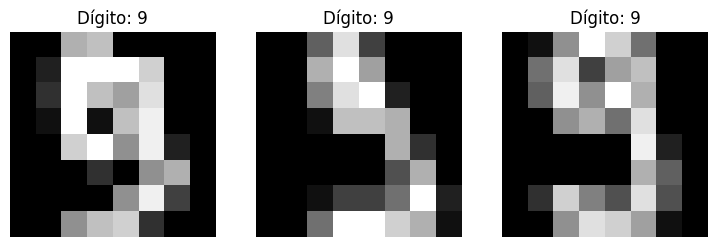

In [3]:
import matplotlib.pyplot as plt

nums = [9, 19, 39]

fig, axs = plt.subplots(1, len(nums), figsize=(3*len(nums),3))

for ax, n in zip(axs, nums):
  ax.imshow(digits.images[n], cmap="gray")
  ax.set_title(f"Dígito: {digits.target[n]}")
  ax.axis("off")

plt.show()


In [11]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

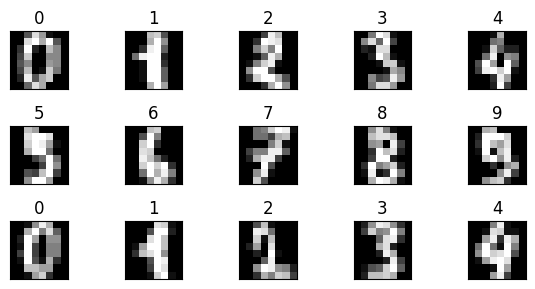

In [12]:
nrows, ncols = 3, 5

plt.figure(figsize=(6,3))
plt.gray()

for i in range(ncols * nrows):

  ax = plt.subplot(nrows, ncols, i + 1)
  ax.imshow(digits.images[i,...])     # plota o imshow dos digitos
  plt.xticks([]); plt.yticks([])     # torna os ticks vazios
  plt.title(digits.target[i])

plt.tight_layout()
plt.show()

Now let's run the t-SNE algorithm on the dataset. It just takes one line with scikit-learn.

In [13]:
digits.data[digits.target==1]

array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       [ 0.,  0.,  0., ..., 15.,  4.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 10.,  0.,  0.],
       [ 0.,  0.,  8., ...,  7.,  0.,  0.],
       [ 0.,  0.,  6., ...,  4.,  0.,  0.]])

In [14]:
import numpy as np

# We first reorder the data points according to the handwritten numbers.

X = np.vstack([digits.data[digits.target==i] for i in range(10)])
y = np.hstack([digits.target[digits.target==i] for i in range(10)])

In [15]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  3., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.]])

In [16]:
y.shape

(1797,)

exemplo de uso do vstack:

In [ ]:
import numpy as np

a = np.array([[1,1]])
b = np.array([[2,2]])
c = np.array([[3,3]])

np.vstack([a, b, c])


In [17]:
# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

In [18]:
seed = 20150101

digits_proj = TSNE(random_state=seed).fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1500, metric="euclidean", random_state=seed)

A função a seguir é para colorir o plot e atribuir as numerração dos clusters

In [19]:
import matplotlib.patheffects as PathEffects

def plot_graph(data, colors):

  fig, ax = plt.subplots(figsize=(5,4))

  sc = ax.scatter(data[:,0], data[:,1], s = 5, c=colors, cmap='tab10')

  txts = []

  for i in range(10):

      xtext, ytext = np.median(digits_proj[colors == i, :], axis=0)                                     # Seleciona todos os pontos do t-SNE que pertencem ao dígito i
      txt = ax.text(xtext, ytext, str(i), fontsize=12)                                                  # Adiciona a string do numero nas medianas
      txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])     # Isso adiciona um contorno branco grosso ao texto
      txts.append(txt)

  return fig, ax, sc, txts

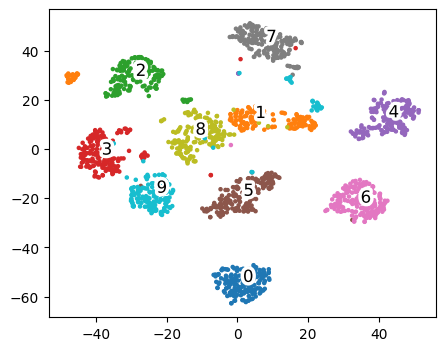

In [20]:
plot_graph(digits_proj, y)

plt.show()

### Create an animation

### Test with different clusters

In [21]:
from sklearn.datasets import make_circles

np.random.seed(1)

# It generates three very clear clusters
c1 = np.random.normal(loc=-4,  scale=0.5, size=(300, 300))
c2 = np.random.normal(loc=0,  scale=0.5, size=(300, 300))
c3 = np.random.normal(loc=5, scale=0.5, size=(300, 300))
x_clust = np.vstack([c1, c2, c3])

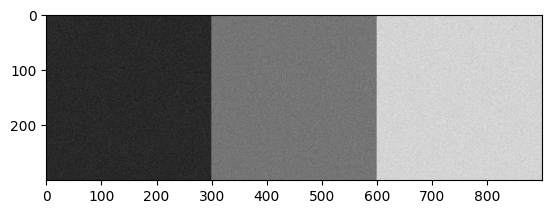

In [22]:
plt.imshow(x_clust.T)

In [23]:
x_clust.shape

(900, 300)

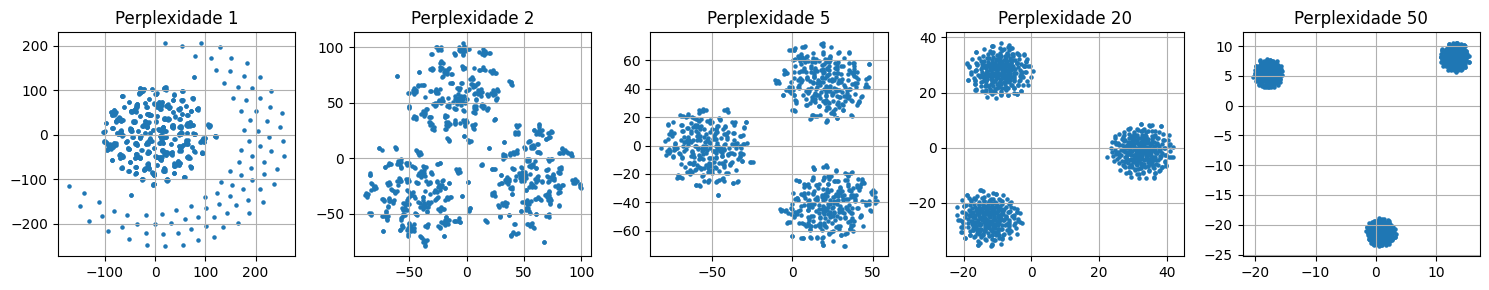

In [24]:
import warnings
warnings.filterwarnings('ignore')

ps = [1, 2, 5, 20, 50]

fig, axs = plt.subplots(1, len(ps), figsize=(3*len(ps), 3))

for i, p in enumerate(ps):

    tsne = TSNE(n_components=2, perplexity=p, learning_rate=200, n_iter=1500, metric="euclidean", random_state=42)
    glitches_2d = tsne.fit_transform(x_clust)

    axs[i].scatter(glitches_2d[:,0], glitches_2d[:,1], s=5)
    axs[i].set_title(f"Perplexidade {p}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [25]:
# Clusters with a non-linear shape - concentric circles
X2d, y = make_circles(n_samples=1000, factor=0.5)
W = np.random.normal(size=(2, 50))
x_circ = X2d @ W + 0.05 * np.random.normal(size=(1000, 50))

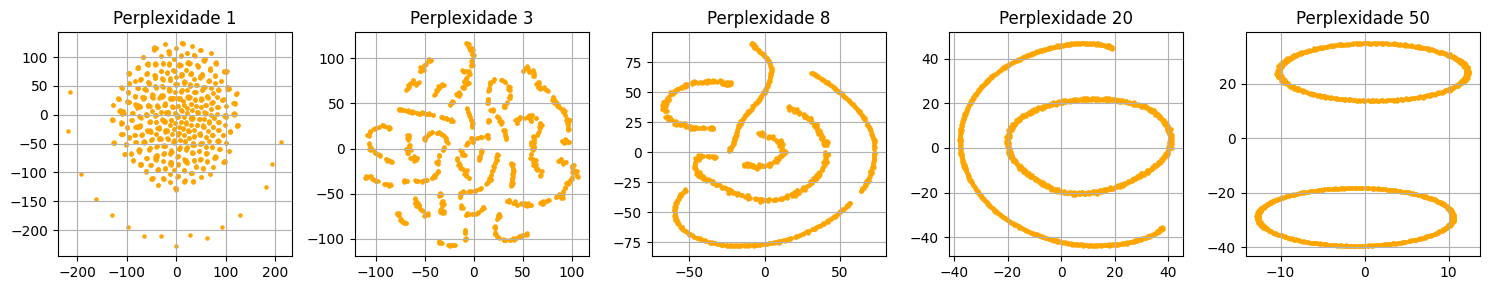

In [26]:
ps2 = [1, 3, 8, 20, 50]

fig, axs = plt.subplots(1, len(ps2), figsize=(3*len(ps2), 3))

for i, p in enumerate(ps2):

    tsne = TSNE(n_components=2, perplexity=p, learning_rate=200, n_iter=1500, metric="euclidean", random_state=42)
    glitches_2d = tsne.fit_transform(x_circ)

    axs[i].scatter(glitches_2d[:,0], glitches_2d[:,1], s=5, c='orange')
    axs[i].set_title(f"Perplexidade {p}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [27]:
# Clusters with different densities
tight = np.random.normal(loc=[0]*30, scale=0.2, size=(300, 30))
mid = np.random.normal(loc=[3]*30, scale=1.0, size=(700, 30))
loose = np.random.normal(loc=[5]*30, scale=2.0, size=(1000, 30))

x_dens = np.vstack([tight, mid, loose])
y = np.array([0]*300 + [1]*700 + [2]*1000)

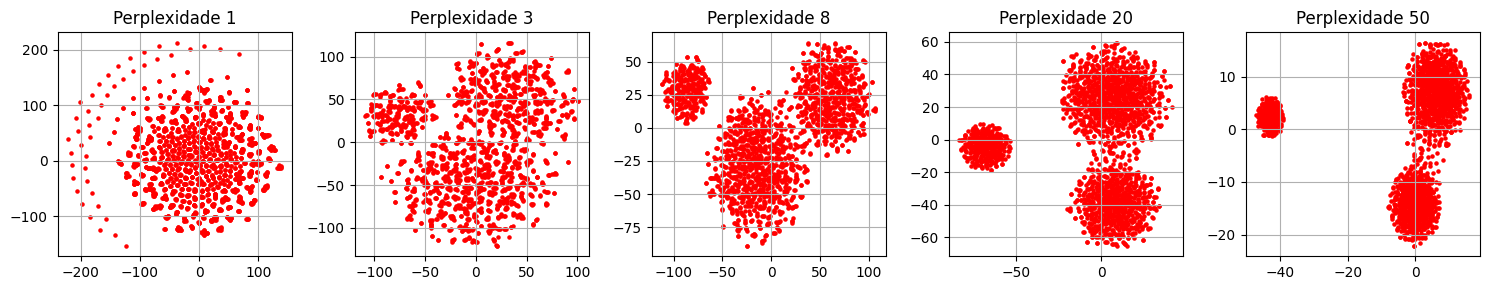

In [28]:
ps3 = [1, 3, 8, 20, 50]

fig, axs = plt.subplots(1, len(ps3), figsize=(3*len(ps3), 3))

for i, p in enumerate(ps3):

    tsne = TSNE(n_components=2, perplexity=p, learning_rate=200, n_iter=1500, metric="euclidean", random_state=42)
    glitches_2d = tsne.fit_transform(x_dens)

    axs[i].scatter(glitches_2d[:,0], glitches_2d[:,1], s=5, c='red')
    axs[i].set_title(f"Perplexidade {p}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

### animation

Here is a utility function used to display the transformed dataset. The color of each point refers to the actual digit (of course, this information was not used by the dimensionality reduction algorithm).

In [ ]:
digits_proj[:,0]

In [ ]:
import seaborn as sns

plt.scatter(digits_proj[:,0], digits_proj[:,1])
plt.show()

'''plt.savefig('images/digits_tsne-generated.png', dpi=120)'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100)
y = np.random.rand(100)
labels = np.random.randint(0, 50, size=100)

plt.scatter(x, y, c=labels)
plt.show()


Let's first import a few libraries.

In [ ]:
import numpy as np

# let's suppose that I have 50 glitchgrams
# using a random matrix to illustrate

N = 50
X = np.random.randn(N, 1024)

In [ ]:
X

Here we have 50 vectors with 1024 size each

### Building the similarity matrix $p_{ij}$ (in the original space)

In [ ]:
def gaussian_func(xi, xj, sigma_i):

  xij = np.linalg.norm(xi-xj)

  num = np.exp(- xij**2 / (2 * sigma_i**2))

  return num

In [ ]:
def compute_pij(X, sigma):

    N = len(X)
    pij = np.zeros((N, N))

    for i in range(N):

        denom = 0.0
        for k in range(N):
            if k != i:
                denom += gaussian_func(X[i], X[k], sigma)

        for j in range(N):
            if j != i:
                pij[i, j] = gaussian_func(X[i], X[j], sigma) / denom
            else:
                pij[i, j] = 0
    return pij

In [ ]:
pi_j = compute_pij(X, 10.0)

pij = (pi_j + pi_j.T) / (2*len(X))
pij

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(pij, cmap = 'gray')
plt.title("Matriz de Similaridade")

plt.colorbar()
plt.show()

### Building the similarity matrix $q_{ij}$ using **GAUSSIAN** (in the new space)

In [ ]:
def gaussian_func_nosigma(yi, yj):

  yij = np.linalg.norm(yi-yj)
  num = np.exp(- yij**2)

  return num

In [ ]:
def compute_qij(Y):

    N = len(Y)
    qij = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if i != j:

                '''yij = np.linalg.norm(Y[i]-Y[j])
                qij[i, j] = np.exp(- yij**2)'''

                qij[i, j] = gaussian_func_nosigma(Y[i], Y[j])

    qij /= np.sum(qij)
    return qij

Cost function $KL(P||Q)$

In [ ]:
def kl_divergence(pij, qij): # Kullback-Leibler divergence

    mask = (pij > 0)
    return np.sum(pij[mask] * np.log(pij[mask] / qij[mask]))

KL gradient (standard SNE formula)

In [ ]:
def compute_gradient(pij, qij, Y):

  N, d = Y.shape
  grad = np.zeros_like(Y)
  sigma = 10.0

  # t-SNE attraction/repulsion force
  for i in range(N):

      diff = Y[i] - Y
      dist2 = np.sum(diff**2,axis=1)

      num = (pij[i] - qij[i]) * np.exp(-dist2/(2*sigma))

      grad[i] = 4 * np.sum(num[:,None] * diff, axis=0)
  return grad

Optimization loop minimizing KL at each iteration.

In [ ]:
def sne(X, dim=2, sigma=10.0, lr=0.1, iters=500):

    N = X.shape[0]

    Y = 1e-4 * np.random.randn(N, dim)

    pij = compute_pij(X, sigma)

    for it in range(iters):

        qij = compute_qij(Y)

        C = kl_divergence(pij, qij)
        grad = compute_gradient(pij, qij, Y)

        Y -= lr * grad

        if it % 50 == 0:
            print(f"iter={it}, KL={C:.6f}")
    return Y

In [ ]:
# 150 points in 50 dimentions
X = np.random.randn(150, 50)

# "lr" is learning rate used in gradient descent
Y = sne(X, dim=2, sigma=10.0, lr=0.1, iters=500)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(Y[:,0], Y[:,1], s=30)
plt.title("SNE using gaussian distribution")
plt.axis('equal')
plt.show()

### Building the similarity matrix $q_{ij}$ using **t-STUDENT** (in the new space)

In [ ]:
def t_distribution(yi, yj):

    rij2 = np.linalg.norm(yi - yj)**2
    return 1 / (1 + rij2)

In [ ]:
def compute_qij_tstudent(Y):

    N = len(Y)
    qij_t = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if i != j:
                qij_t[i, j] = t_distribution(Y[i], Y[j])

    qij_t /= np.sum(qij_t)
    return qij_t

Cost function $KL(P||Q)$

In [ ]:
def kl_divergence(P, Q):
    mask = (P > 0)
    return np.sum(P[mask] * np.log(P[mask] / Q[mask]))

KL gradient (standard t-SNE formula)

In [ ]:
def compute_gradient(P, Q, Y):
    N, d = Y.shape
    grad = np.zeros_like(Y)

    # t-SNE attraction/repulsion force
    for i in range(N):
        diff = Y[i] - Y
        dist2 = np.sum(diff**2, axis=1)
        num = (P[i] - Q[i]) * (1 / (1 + dist2))

        grad[i] = 4 * np.sum(num[:,None] * diff, axis=0)
    return grad

Optimization loop: minimizing KL at each iteration

In [ ]:
def tsne(X, dim=2, sigma=1.0, lr=0.1, iters=500):
    N = X.shape[0]

    Y = 1e-4 * np.random.randn(N, dim)

    P = compute_pij(X, sigma)

    for it in range(iters):

        Q = compute_qij(Y)
        C = kl_divergence(P, Q)
        grad = compute_gradient(P, Q, Y)

        Y -= lr * grad

        if it % 50 == 0:
            print(f"iter={it}, KL={C:.6f}")

    return Y

In [ ]:
X = np.random.randn(200, 50)   # 200 pontos em 50 dimensões
Y = tsne(X, dim=2, lr=0.1, iters=500)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(Y[:,0], Y[:,1], s=30)
plt.title("t-SNE using t-student distribution")
plt.axis('equal')
plt.show()


In [ ]:
for it in range(1000):
    Q = compute_qij(Y)
    grad = compute_gradient(P, Q, Y)
    Y = Y - lr * gra

In [ ]:
def tsne_run(pij, dim=2, T=500, eta=200, alpha=0.5):
    N = pij.shape[0]

    # Inicialização aleatória (gaussiana pequena)
    Y = np.random.normal(0, 1e-4, size=(N, dim))
    Y_prev = np.copy(Y)

    for t in range(T):

        # Low-dimensional affinities
        qij = compute_qij(Y)

        # Compute gradient
        grad = compute_gradient(pij, qij, Y)

        # Atualização com momentum
        Y_new = (
            Y                       # valor atual
            + eta * grad            # passo do gradiente
            + alpha * (Y - Y_prev)  # momentum
        )

        # prepara próxima iteração
        Y_prev = Y
        Y = Y_new

        if t % 50 == 0:
            print(f"Iteração {t}")

    return Y

In [ ]:
def compute_gradient(P, Q, Y):
    N = Y.shape[0]
    dY = np.zeros_like(Y)

    for i in range(N):
        for j in range(N):
            if i != j:
                diff = Y[i] - Y[j]
                dist2 = np.sum(diff**2)
                w = 4 * (P[i, j] - Q[i, j]) * (1 / (1 + dist2))
                dY[i] += w * diff

    return dY

In [ ]:
Y = tsne_run(pij, T=500)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y[:,0], Y[:,1])
plt.show()

In [ ]:
import numpy as np

N = 50
X = np.random.randn(N, 300)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

models = {
    "PCA": PCA(n_components=2),
    "t-SNE": TSNE(n_components=2),
    "UMAP": umap.UMAP(n_components=2),
    "Isomap": Isomap(n_components=2)
}

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, (name, model) in zip(axes.flatten(), models.items()):
    X_red = model.fit_transform(X_scaled)
    ax.scatter(X_red[:,0], X_red[:,1])
    ax.set_title(name)

plt.tight_layout()
plt.show()
